# K-means Clustering on Diabetes Dataset (gene --> positive / negative)
## _Author(s): Wai Yuen (Wylliam) Cheng_

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

### Data Ingestion

In [3]:
df_human_gene = pd.read_csv("../BE700_human_expression.(1) (1) (1).csv", sep=",", index_col=0)
df_human_pheno = pd.read_csv("../human_pheno_postprocessed.csv", sep=",", index_col=0)

## Removing columns with missing data for all samples under the 'DM' class
df_human_pheno = df_human_pheno.drop(columns=["2 hour glucose (ogtt):ch1", "fasting glucose (ogtt):ch1"])
df_human_pheno

,age (years):ch1,body mass index (kg/m2):ch1,family history:ch1,fasting glucose (iv0gavg):ch1,fasting insulin (iv0inavg):ch1,gender:ch1,hemoglobin a1c:ch1,si:ch1,waist hip ratio:ch1,diabete_2
GSM624925,39,20,Family history negative,90,2.70,female,5.6,11.91,1.364,0
GSM624926,23,23,Family history negative,87,4.40,male,5.0,8.31,0.792,0
GSM624927,42,21,Family history negative,79,6.10,female,4.6,1.59,0.824,0
GSM624928,40,27,Family history negative,91,5.60,male,5.1,8.38,0.981,0
GSM624929,57,22,Family history negative,94,5.00,female,5.5,4.06,NaN,0
GSM624930,23,25,Family history negative,91,8.00,female,4.3,6.53,0.833,0
GSM624931,46,26,Family history negative,88,4.40,female,5.4,10.39,0.845,0
GSM624932,28,24,Family history negative,83,1.70,male,4.7,14.28,0.865,0
GSM624933,38,25,Family history negative,88,4.60,male,5.1,10.29,0.902,0
GSM624934,50,33,Family history negative,109,15.90,male,5.4,1.70,1.018,0


In [4]:
## Convert SI to log(SI)
df_human_pheno['si:ch1'] = np.log(df_human_pheno['si:ch1'])
df_human_pheno

,age (years):ch1,body mass index (kg/m2):ch1,family history:ch1,fasting glucose (iv0gavg):ch1,fasting insulin (iv0inavg):ch1,gender:ch1,hemoglobin a1c:ch1,si:ch1,waist hip ratio:ch1,diabete_2
GSM624925,39,20,Family history negative,90,2.70,female,5.6,2.477378,1.364,0
GSM624926,23,23,Family history negative,87,4.40,male,5.0,2.117460,0.792,0
GSM624927,42,21,Family history negative,79,6.10,female,4.6,0.463734,0.824,0
GSM624928,40,27,Family history negative,91,5.60,male,5.1,2.125848,0.981,0
GSM624929,57,22,Family history negative,94,5.00,female,5.5,1.401183,NaN,0
GSM624930,23,25,Family history negative,91,8.00,female,4.3,1.876407,0.833,0
GSM624931,46,26,Family history negative,88,4.40,female,5.4,2.340844,0.845,0
GSM624932,28,24,Family history negative,83,1.70,male,4.7,2.658860,0.865,0
GSM624933,38,25,Family history negative,88,4.60,male,5.1,2.331173,0.902,0
GSM624934,50,33,Family history negative,109,15.90,male,5.4,0.530628,1.018,0


### Data Imputation

In [5]:
from sklearn.impute import KNNImputer
nan = np.nan
X = np.array(df_human_pheno['si:ch1']).reshape(-1, 1)
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_human_pheno['si:ch1'] = imputer.fit_transform(X)
X = np.array(df_human_pheno['waist hip ratio:ch1']).reshape(-1, 1)
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_human_pheno['waist hip ratio:ch1'] = imputer.fit_transform(X)

df_human_pheno

,age (years):ch1,body mass index (kg/m2):ch1,family history:ch1,fasting glucose (iv0gavg):ch1,fasting insulin (iv0inavg):ch1,gender:ch1,hemoglobin a1c:ch1,si:ch1,waist hip ratio:ch1,diabete_2
GSM624925,39,20,Family history negative,90,2.70,female,5.6,2.477378,1.364000,0
GSM624926,23,23,Family history negative,87,4.40,male,5.0,2.117460,0.792000,0
GSM624927,42,21,Family history negative,79,6.10,female,4.6,0.463734,0.824000,0
GSM624928,40,27,Family history negative,91,5.60,male,5.1,2.125848,0.981000,0
GSM624929,57,22,Family history negative,94,5.00,female,5.5,1.401183,0.889735,0
GSM624930,23,25,Family history negative,91,8.00,female,4.3,1.876407,0.833000,0
GSM624931,46,26,Family history negative,88,4.40,female,5.4,2.340844,0.845000,0
GSM624932,28,24,Family history negative,83,1.70,male,4.7,2.658860,0.865000,0
GSM624933,38,25,Family history negative,88,4.60,male,5.1,2.331173,0.902000,0
GSM624934,50,33,Family history negative,109,15.90,male,5.4,0.530628,1.018000,0


### Top 100/1000 Gene Extraction [from t-test]

In [26]:
top_100_classified_gene = list(pd.read_csv("../Relevance & Correlation Analysis/welch_t_test_results_to_d2.csv", index_col=0).head(100).index)
top_1000_classified_gene = list(pd.read_csv("../Relevance & Correlation Analysis/welch_t_test_results_to_d2.csv", index_col=0).head(1000).index)

### K-Means top 100 genes

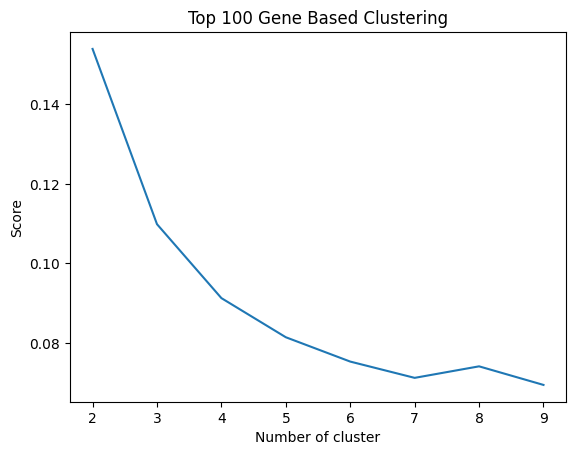

In [23]:
scaling = StandardScaler()

df_100_human_gene = scaling.fit_transform(df_human_gene.loc[top_100_classified_gene].T)

metrics = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0).fit(df_100_human_gene)
    # metrics[k] = kmeans.inertia_ 
    metrics[k] = silhouette_score(df_100_human_gene, kmeans.labels_, metric='euclidean')

plt.figure()
plt.plot(list(metrics.keys()), list(metrics.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Score")
plt.title("Top 100 Gene Based Clustering")
plt.show()
# centers = kmeans.cluster_centers_
# print(centers)

### K-Means top 1000 genes

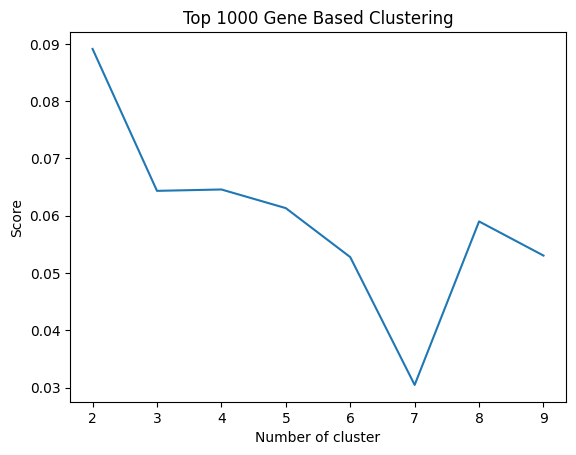

In [25]:
scaling = StandardScaler()

df_1000_human_gene = scaling.fit_transform(df_human_gene.loc[top_1000_classified_gene].T)

metrics = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0).fit(df_1000_human_gene)
    # metrics[k] = kmeans.inertia_ 
    metrics[k] = silhouette_score(df_1000_human_gene, kmeans.labels_, metric='euclidean')

plt.figure()
plt.plot(list(metrics.keys()), list(metrics.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Score")
plt.title("Top 1000 Gene Based Clustering")
plt.show()
# centers = kmeans.cluster_centers_
# print(centers)

### 2 Cluster K-Means Top 100 Genes

In [30]:
scaling = StandardScaler()

df_100_human_gene = scaling.fit_transform(df_human_gene.loc[top_100_classified_gene].T)

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0).fit(df_100_human_gene)

groundtruth = list(df_human_pheno["diabete_2"])
clustered_labels = kmeans.labels_
count = len(clustered_labels)
correct = 0
for predicted, target in zip(clustered_labels, groundtruth):
    if (predicted == target):
        correct += 1
print(f"Fitting rate toward Diabete (positive/negative) Class: {correct/count * 100}%")

Fitting rate toward Diabete (positive/negative) Class: 100.0%


### 2 Cluster K-Means Top 1000 Genes

In [32]:
scaling = StandardScaler()

df_1000_human_gene = scaling.fit_transform(df_human_gene.loc[top_1000_classified_gene].T)

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0).fit(df_1000_human_gene)

groundtruth = list(df_human_pheno["diabete_2"])
clustered_labels = kmeans.labels_
count = len(clustered_labels)
correct = 0
for predicted, target in zip(clustered_labels, groundtruth):
    if (predicted == target):
        correct += 1
print(f"Fitting rate toward Diabete (positive/negative) Class: {correct/count * 100}%")

Fitting rate toward Diabete (positive/negative) Class: 94.0%


***

### Top 100/1000 Gene Extraction [from ANOVA]

In [33]:
top_100_classified_gene = list(pd.read_csv("../Relevance & Correlation Analysis/anova_results_to_d2_A1C.csv", index_col=0).head(100).index)
top_1000_classified_gene = list(pd.read_csv("../Relevance & Correlation Analysis/anova_results_to_d2_A1C.csv", index_col=0).head(1000).index)

### K-Means top 100 genes

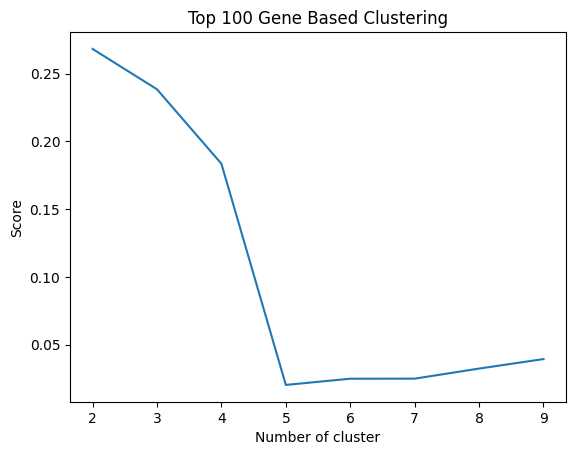

In [34]:
scaling = StandardScaler()

df_100_human_gene = scaling.fit_transform(df_human_gene.loc[top_100_classified_gene].T)

metrics = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0).fit(df_100_human_gene)
    # metrics[k] = kmeans.inertia_ 
    metrics[k] = silhouette_score(df_100_human_gene, kmeans.labels_, metric='euclidean')

plt.figure()
plt.plot(list(metrics.keys()), list(metrics.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Score")
plt.title("Top 100 Gene Based Clustering")
plt.show()
# centers = kmeans.cluster_centers_
# print(centers)

### K-Means top 1000 genes

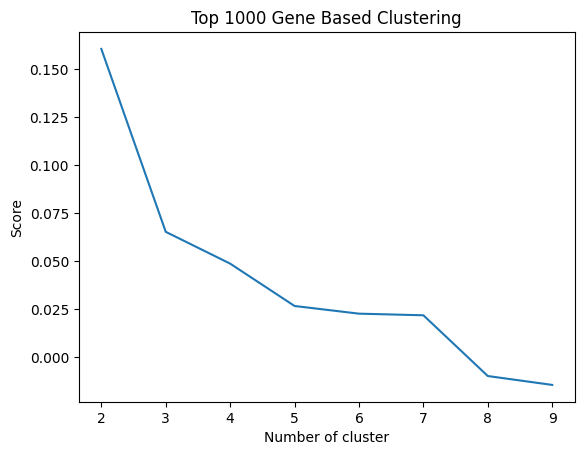

In [35]:
scaling = StandardScaler()

df_1000_human_gene = scaling.fit_transform(df_human_gene.loc[top_1000_classified_gene].T)

metrics = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0).fit(df_1000_human_gene)
    # metrics[k] = kmeans.inertia_ 
    metrics[k] = silhouette_score(df_1000_human_gene, kmeans.labels_, metric='euclidean')

plt.figure()
plt.plot(list(metrics.keys()), list(metrics.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Score")
plt.title("Top 1000 Gene Based Clustering")
plt.show()
# centers = kmeans.cluster_centers_
# print(centers)

### 3 Cluster Prep

In [38]:
df_human_pheno = df_human_pheno.assign(
    A1C_Class=list(df_human_pheno.apply(
        lambda x: 0 if x["hemoglobin a1c:ch1"] < 5.7 else 1 if x["hemoglobin a1c:ch1"] < 6.4 else 2,
        axis=1
    ))
)
df_human_pheno

,age (years):ch1,body mass index (kg/m2):ch1,family history:ch1,fasting glucose (iv0gavg):ch1,fasting insulin (iv0inavg):ch1,gender:ch1,hemoglobin a1c:ch1,si:ch1,waist hip ratio:ch1,diabete_2,A1C_Class
GSM624925,39,20,Family history negative,90,2.70,female,5.6,2.477378,1.364000,0,0
GSM624926,23,23,Family history negative,87,4.40,male,5.0,2.117460,0.792000,0,0
GSM624927,42,21,Family history negative,79,6.10,female,4.6,0.463734,0.824000,0,0
GSM624928,40,27,Family history negative,91,5.60,male,5.1,2.125848,0.981000,0,0
GSM624929,57,22,Family history negative,94,5.00,female,5.5,1.401183,0.889735,0,0
GSM624930,23,25,Family history negative,91,8.00,female,4.3,1.876407,0.833000,0,0
GSM624931,46,26,Family history negative,88,4.40,female,5.4,2.340844,0.845000,0,0
GSM624932,28,24,Family history negative,83,1.70,male,4.7,2.658860,0.865000,0,0
GSM624933,38,25,Family history negative,88,4.60,male,5.1,2.331173,0.902000,0,0
GSM624934,50,33,Family history negative,109,15.90,male,5.4,0.530628,1.018000,0,0


### 3 Cluster K-Means Top 100 Genes

In [39]:
scaling = StandardScaler()

df_100_human_gene = scaling.fit_transform(df_human_gene.loc[top_100_classified_gene].T)

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0).fit(df_100_human_gene)

groundtruth = list(df_human_pheno["A1C_Class"])
clustered_labels = kmeans.labels_
count = len(clustered_labels)
correct = 0
for predicted, target in zip(clustered_labels, groundtruth):
    if (predicted == target):
        correct += 1
print(f"Fitting rate toward A1C CDC Severity (normal/(pre)diabetes) Class: {correct/count * 100}%")

Fitting rate toward A1C CDC Severity (normal/(pre)diabetes) Class: 86.0%


### 3 Cluster K-Means Top 1000 Genes

In [40]:
scaling = StandardScaler()

df_1000_human_gene = scaling.fit_transform(df_human_gene.loc[top_1000_classified_gene].T)

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0).fit(df_1000_human_gene)

groundtruth = list(df_human_pheno["A1C_Class"])
clustered_labels = kmeans.labels_
count = len(clustered_labels)
correct = 0
for predicted, target in zip(clustered_labels, groundtruth):
    if (predicted == target):
        correct += 1
print(f"Fitting rate toward A1C CDC Severity (normal/(pre)diabetes) Class: {correct/count * 100}%")

Fitting rate toward A1C CDC Severity (normal/(pre)diabetes) Class: 82.0%
